# Linear regression from scratch using python

import statements below for handling data

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
auto_full=pd.read_csv('C:\\Users\\sagar\\Documents\\GitHub\\nagendra\\ML\\Automobile Linear regression\\automobile.csv',names=columns)

cleaning the dataset

In [3]:
auto_full.dropna(inplace=True)
auto_full['horsepower']=auto_full['horsepower'].apply(int)
auto_full['price']=auto_full['price'].apply(int)

let's only consider horse power versus the price for simple linear regression now

In [5]:
X=auto_full['horsepower']
y=auto_full['price']

C:\Users\sagar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


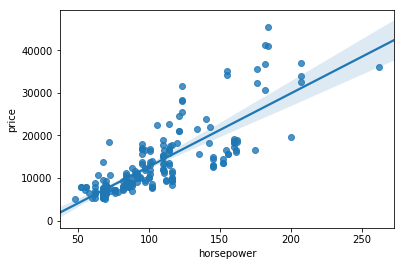

In [6]:
sns.regplot(x=X,y=y)
plt.show()

from the above graph, the relationship is mostly linear, we will try a linear model from scratch using python and use the existing libraries to predict the price variable

## some theory for simple linear regression

y = b0 + b1 * x
b0 is constant or intercept
b1 is slope or coefficient
y is the target variable
x is the predictor
Below formulae can be used to pedict the target variable

B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
B0 = mean(y) - B1 * mean(x)

mean= sum(values)/num(values)
variance and other variables where divided by number of values is intentionally ommitted as they will be cancelled while determining the coefficients

In [7]:
def mean(x):
    return sum(x)/float(len(x))

variance has to be calculated as below
variance = sum( (x - mean(x))^2 )

In [18]:
def variance(values):
    mean_x=mean(values)
    return sum([(x-mean_x)**2 for x in values])

In [19]:
mean_x,mean_y=mean(X),mean(y)

In [21]:
variance_x,variance_y=variance(X),variance(y)

In [22]:
print('mean of X is %.3f,variance of X is %.3f'%(mean_x,variance_x))
print('mean of y is %.3f,variance of y is %.3f'%(mean_y,variance_y))

mean of X is 103.397,variance of X is 279237.638
mean of y is 13243.432,variance of y is 12604635470.834


need to calculate co-variance between two variables(input and output)

covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))

In [23]:
def covariance(x, y):
    mean_x,mean_y=mean(X),mean(y)
    covar =sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))])
    return covar

In [24]:
covar = covariance(X, y)

In [25]:
print('Covariance: %.3f' % (covar))

Covariance: 48086466.859


*B1 = covariance(x, y) / variance(x)

In [26]:
def coeff(x,y):
    mean_x,mean_y=mean(x),mean(y)
    B1=covariance(x,y)/variance(x)
    B0 = mean(y) - B1 * mean(x)
    print('B1(aka slope)=%.3f'%B1)
    print('B0(aka intercept)=%.3f'%B0)
    return([B1,B0])

## before predicting, we need a metric to test our process

1. RMSE(root mean squared error)

In [41]:
def RMSE(actual,predicted):
    error=0.0
    for i in range(len(actual)):
        pred_error = predicted[i]-actual[i]
        error += pred_error**2
    mean_error=error/float(len(actual))
    return sqrt(mean_error)

def predict(x_train,y_train,x_test):
    [B1,B0]=coeff(x_train,y_train)
    y_hat=[B1*x_test[i]+B0 for i in range(len(x_test))]
    return(y_hat)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_hat=predict(list(x_train),list(y_train),list(x_test))    

B1(aka slope)=170.996
B0(aka intercept)=-4540.053


*RMSE will be in units of the dependent variable(Y).

In [53]:
scratch_rmse=RMSE(list(y_test),list(y_hat))
print(f'Root mean squared error using formulae is {scratch_rmse}')

Root mean squared error using formulae is 4336.993658644046


### Now, we will test using python libraries sklearn and we will compare the RMSE

In [55]:
regressor=LinearRegression()

we need to reshape the train and test datasets using numpy

In [77]:
X_train=np.reshape(list(x_train),(-1, 1))
Y_train=np.reshape(list(y_train),(-1, 1))
X_test=np.reshape(list(x_test),(-1, 1))
Y_test=np.reshape(list(y_test),(-1, 1))

In [78]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
Y_hat=regressor.predict(X_test)

In [84]:
python_RMSE=sqrt(mean_squared_error(Y_test,Y_hat))
print(f'Root mean squared error using formulae is {python_RMSE}')

Root mean squared error using formulae is 4336.993658644048


### both are same, so we are good :D